<h1 align="center">Gas ideal: número de partículas, presión, voumen y temperatura.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

Este *Jupyter Notebook* ha sido creado con el propósito de analizar el número de partículas, presión, volumen y temperatura del gas ideal utilizando el simulador [Propiedades de los Gases de PhET](https://phet.colorado.edu/es/simulation/gas-properties).

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Relación entre la presión y el número de partículas
Con el simulador para [Gas Ideal de PhET](https://phet.colorado.edu/sims/html/gas-properties/latest/gas-properties_es.html), recolecte datos y grafique la presión en función del número de partículas sin ninguna ligadura (Mantener Constante: Nada).

### 2.1. Solo partículas pesadas
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [2]:
ancho =  10 # nm
T     = 300 # K
data1_list = [
    ['pesadas', 'Presion [kPa]'],
    [ 50      ,  614],
    [ 50      ,  563],
    [ 50      ,  590],
    [ 50      ,  573],
    [100      , 1196],
    [100      , 1137],
    [100      , 1225],
    [100      , 1204],
    [150      , 1738],
    [150      , 1802],
    [150      , 1817],
    [150      , 1793],
]

In [3]:
data1 = pd.DataFrame(data1_list[1:], columns=data1_list[0])
data1

,pesadas,Presion [kPa]
0,50,614
1,50,563
2,50,590
3,50,573
4,100,1196
5,100,1137
6,100,1225
7,100,1204
8,150,1738
9,150,1802


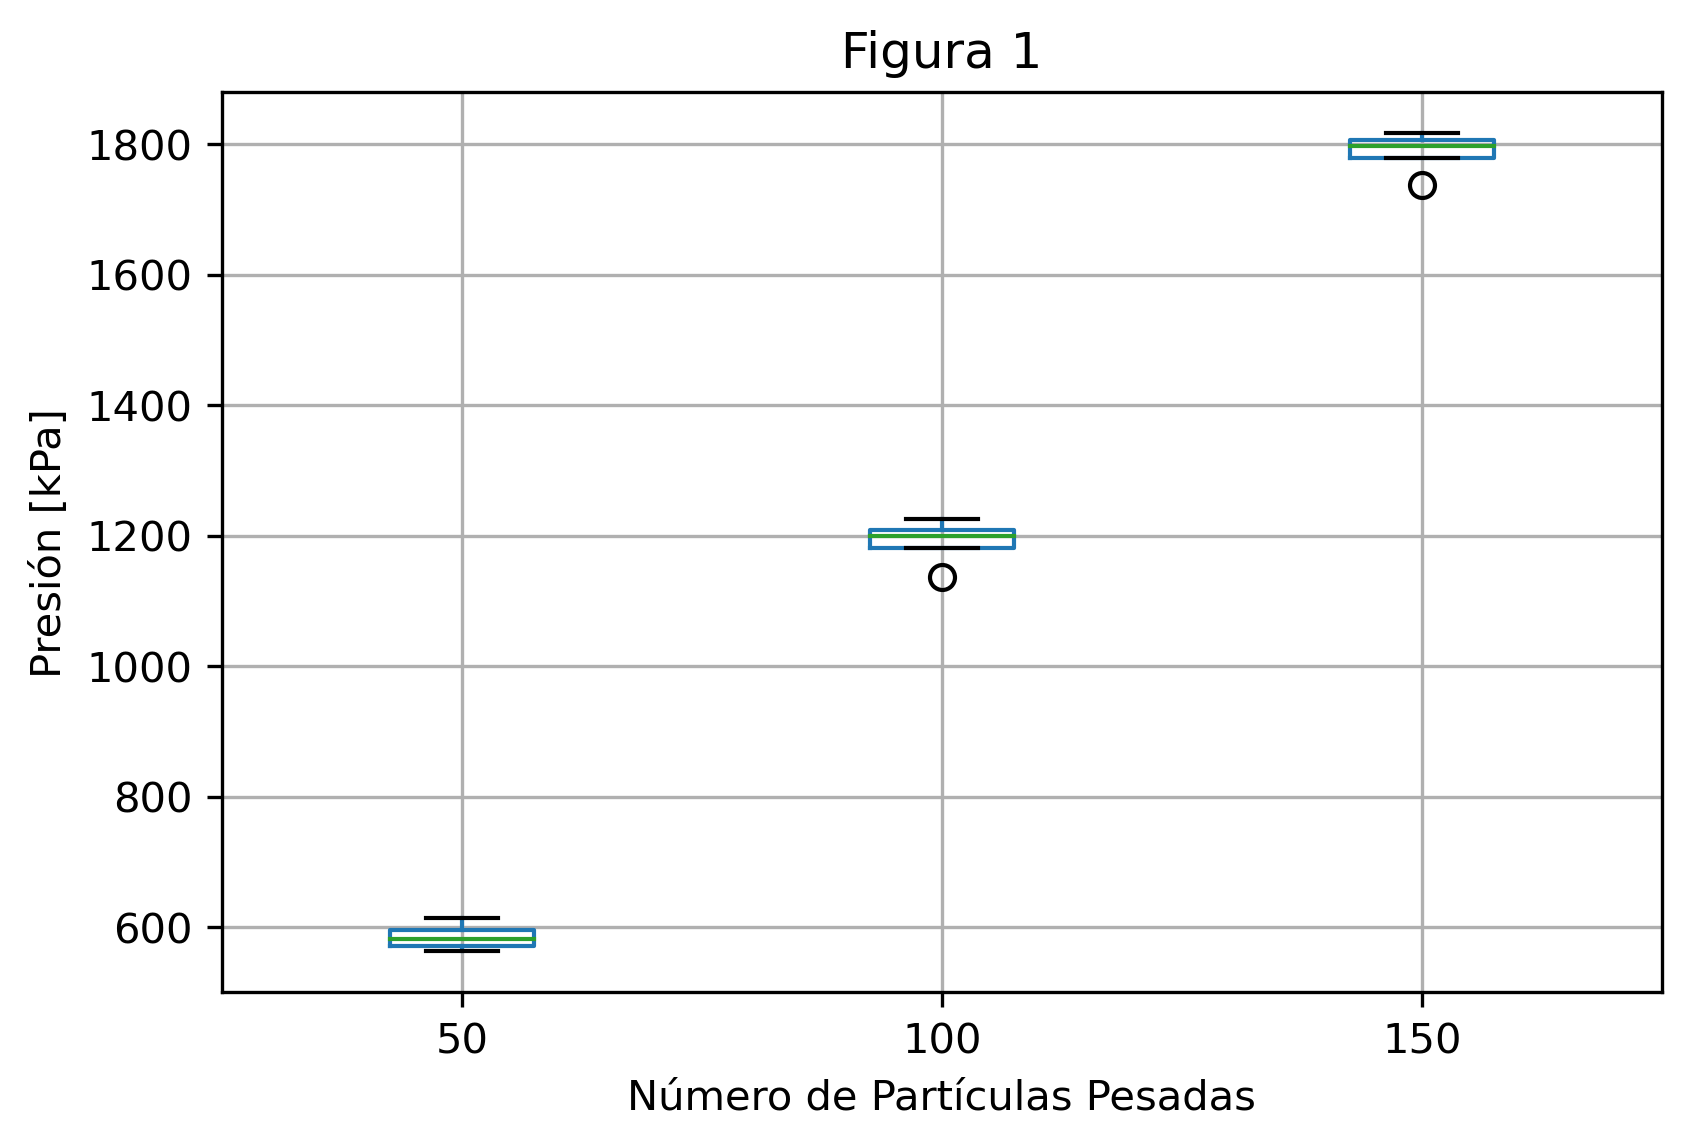

In [4]:
plt.figure(dpi=300)
axes =  data1.boxplot(
    by='pesadas', 
    column='Presion [kPa]',
    ax=plt.gca())
fig = axes.get_figure()
fig.suptitle('')
plt.xlabel('Número de Partículas Pesadas')
plt.ylabel('Presión [kPa]')
_ = plt.title('Figura 1')

### 2.2. Solo partículas ligeras
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [10]:
ancho =  10 # nm
T     = 300 # K
data2_list = [
    ['ligeras', 'Presion [kPa]'],
    [ 50       ,   566],
    [ 50       ,   606],
    [ 50       ,   551],
    [ 50       ,   573],
    [100       ,  1206],
    [100       ,  1224],
    [100       ,  1147],
    [100       ,  1176],
    [150       ,  1767],
    [150       ,  1791],
    [150       ,  1762],
    [150       ,  1813],
]

In [11]:
data2 = pd.DataFrame(data2_list[1:], columns=data2_list[0])

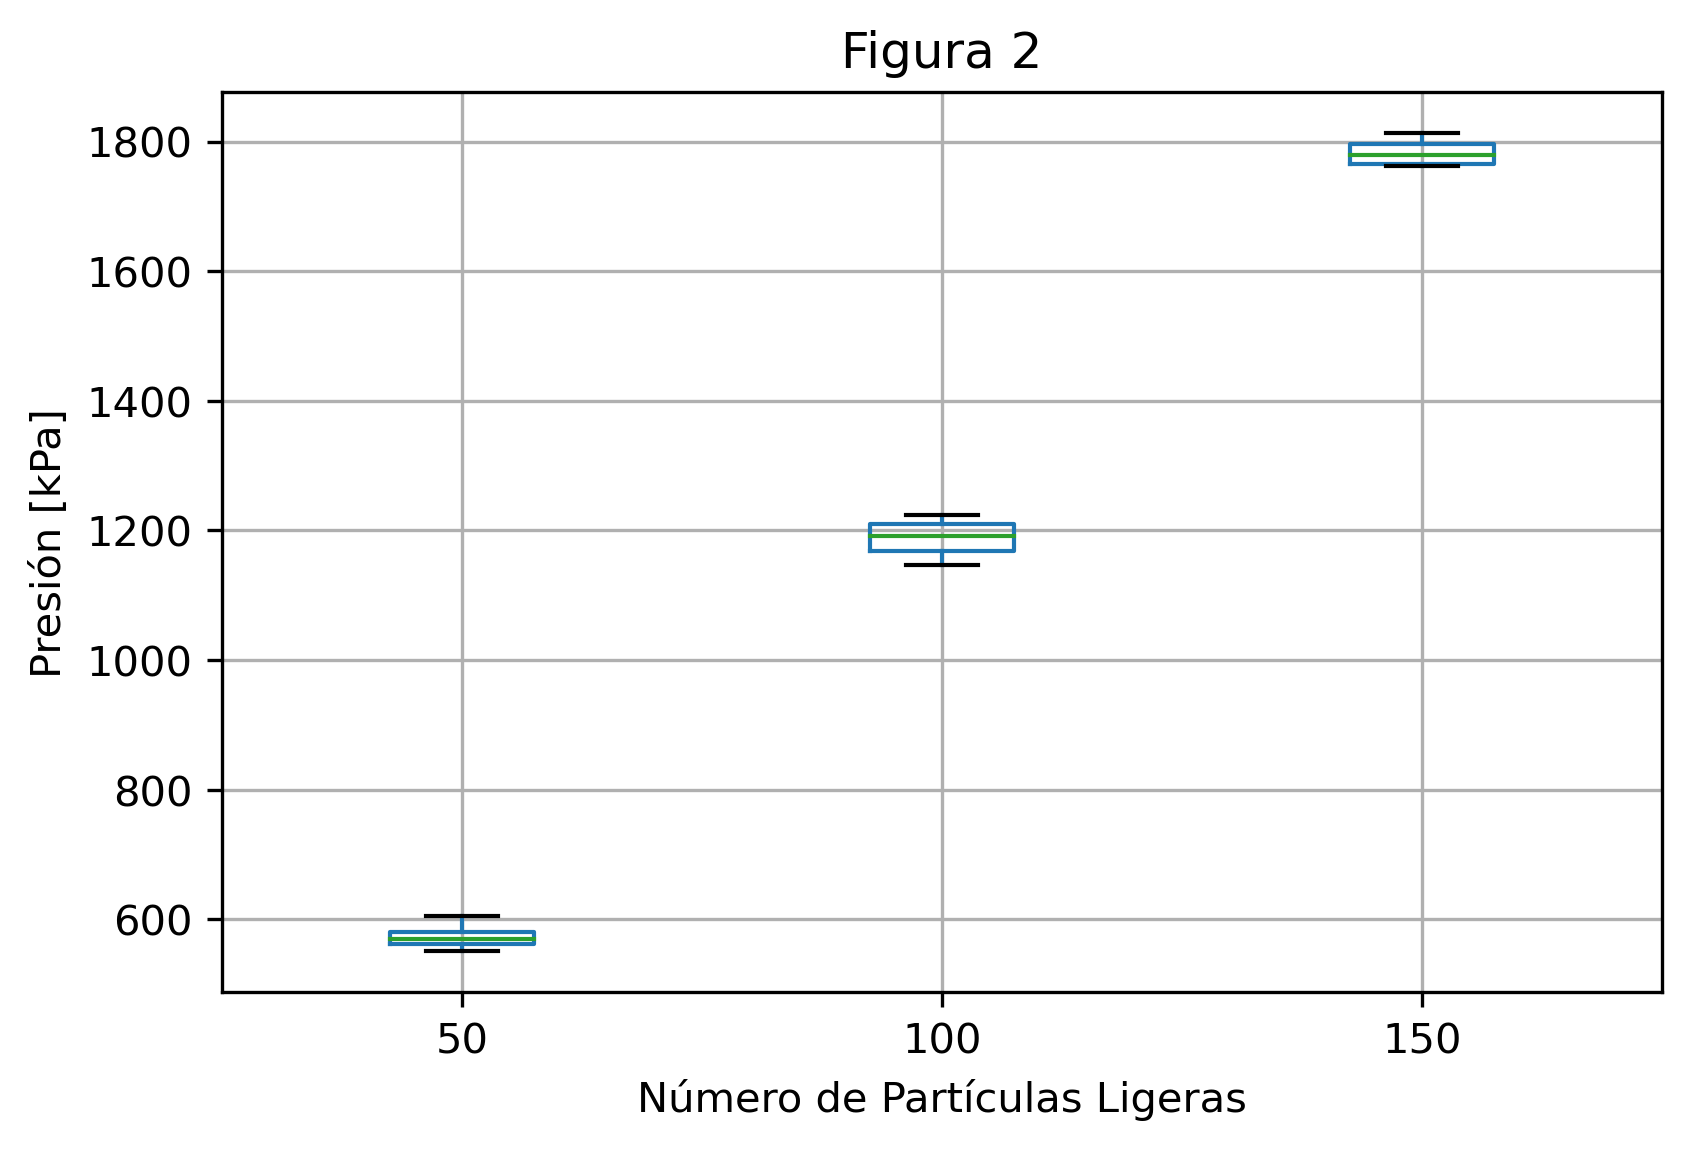

In [12]:
plt.figure(dpi=300)
axes =  data2.boxplot(
    by='ligeras', 
    column='Presion [kPa]',
    ax=plt.gca())
fig = axes.get_figure()
fig.suptitle('')
plt.xlabel('Número de Partículas Ligeras')
plt.ylabel('Presión [kPa]')
_ = plt.title('Figura 2')

### 2.3. Partículas ligeras y pesadas
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [13]:
ancho =  10 # nm
T     = 300 # K
data3_list = [
    ['ligeras', 'pesadas', 'Presion [kPa]'],
    [ 50      ,  0       ,   556],
    [ 50      ,  0       ,   606],
    [ 50      ,  0       ,   551],
    [ 50      ,  0       ,   573],
    [ 50      , 50       ,  1208],
    [ 50      , 50       ,  1152],
    [ 50      , 50       ,  1219],
    [ 50      , 50       ,  1167],
    [100      , 50       ,  2081],
    [100      , 50       ,  2098],
    [100      , 50       ,  2060],
    [100      , 50       ,  2076],
]

In [14]:
data3 = pd.DataFrame(data3_list[1:], columns=data3_list[0])

In [32]:
mean1_list = [['ligeras', 'pesadas', 'Presion media [kPa]']]
for g1, df1 in data3.groupby('ligeras'):
    for g2, df2 in df1.groupby('pesadas'):
        mean1_list.append(
            [g1, g2, np.mean(df2['Presion [kPa]'])]
        )
mean1 = pd.DataFrame(mean1_list[1:], columns=mean1_list[0])
mean1

,ligeras,pesadas,Presion media [kPa]
0,50,0,571.50
1,50,50,1186.50
2,100,50,2078.75


Text(0, 0.5, 'Número de partículas pesadas')

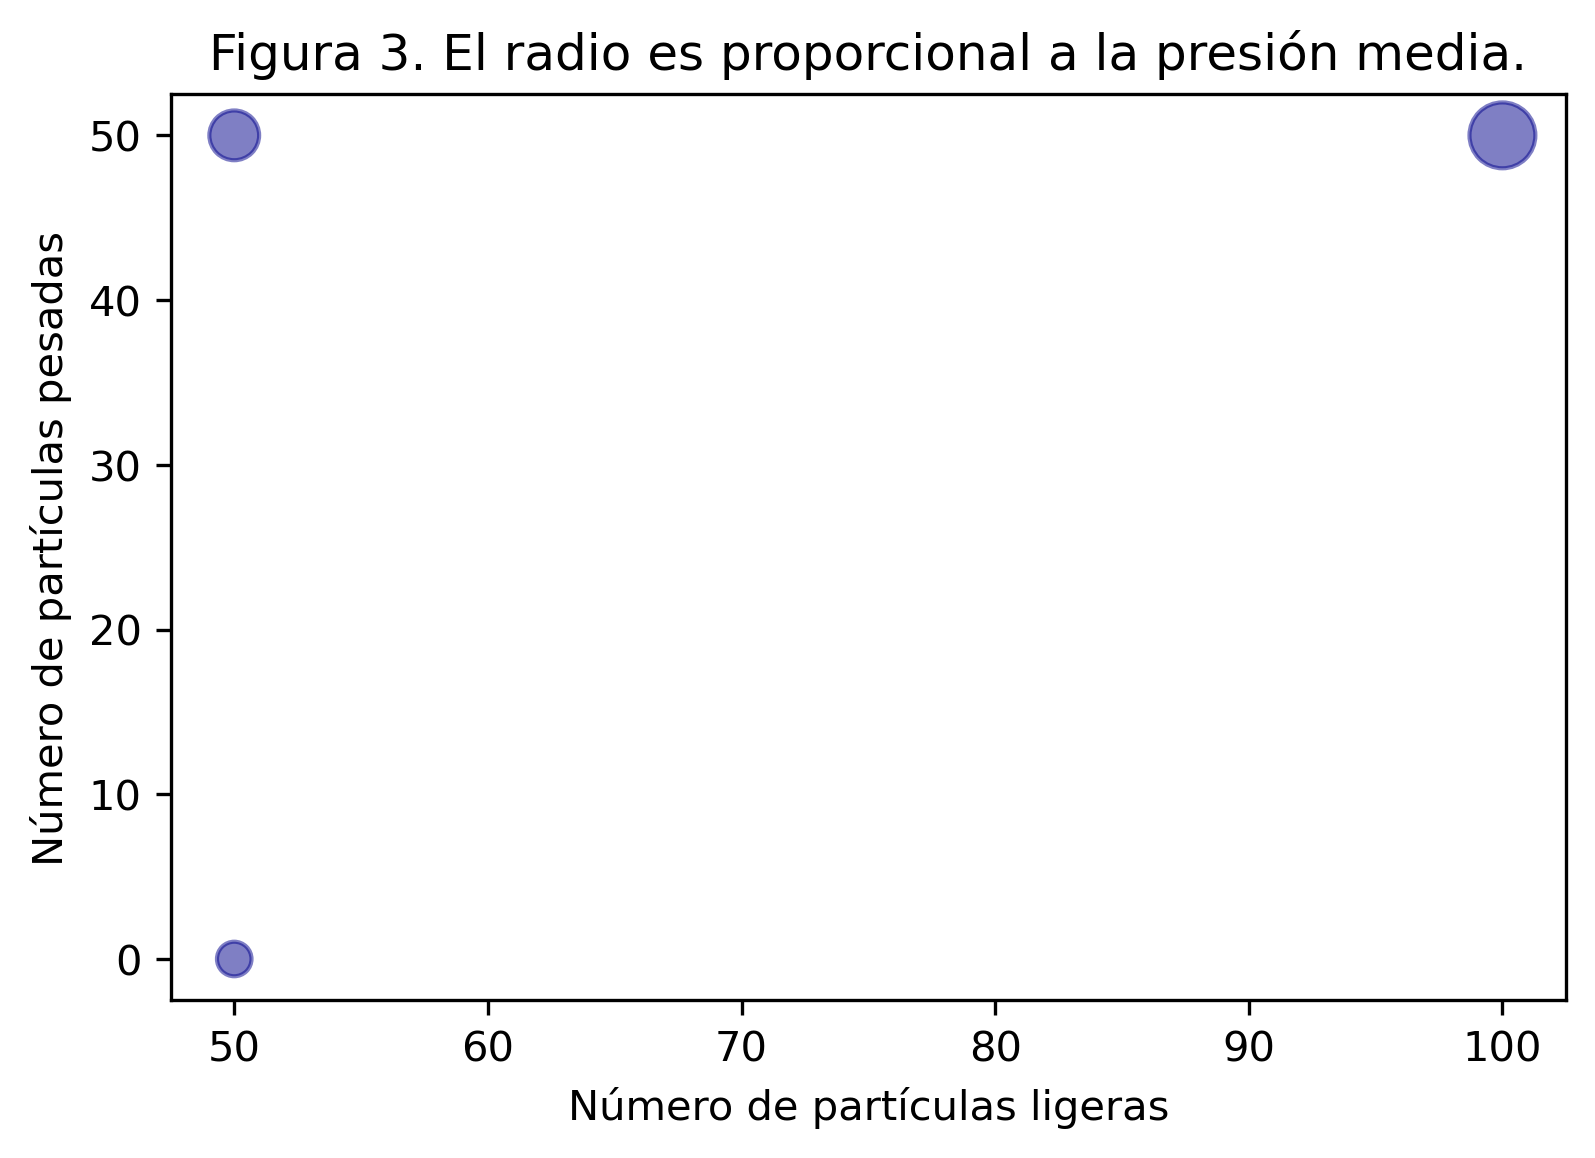

In [39]:
plt.figure(dpi=300)
plt.title('Figura 3. El radio es proporcional a la presión media.')
P = mean1['Presion media [kPa]']
plt.scatter(
    mean1['ligeras'],
    mean1['pesadas'],
    s=250*P/max(P),
    color='darkblue',
    alpha=0.5)
plt.xlabel('Número de partículas ligeras')
plt.ylabel('Número de partículas pesadas')